# MACE method

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from numpy import cos, sin
from numpy import sqrt
import time
from scipy.sparse.linalg import expm
from pympler import asizeof
import pandas as pd

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)


label_size = 20


In [2]:
import matplotlib.pyplot as plt
import numpy as np
#from google.colab import files

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin

label_size = 20

from numpy import sqrt

import time
from numba import jit
from numpy import sin, cos

T0=time.time()

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

In [3]:

import matplotlib.pyplot as plt
%matplotlib inline
from numpy import random, zeros, sqrt,cos,sin

import matplotlib.pyplot as plt
import numpy as np

from numba import jit
import numbers

from numpy import sqrt, zeros, diag, random, real, array, complex_, transpose, conjugate, exp, matmul, real


import matplotlib
import matplotlib.pyplot as plt
from scipy.linalg import norm
from numpy import dot

from numpy import pi as pi
from numpy import array

import scipy

from numpy import exp, imag, real,zeros, conj
from numpy import sum
from scipy import sparse
from numpy import array
import scipy.sparse as sp
from numpy import concatenate

from scipy.sparse import csr_matrix
from numpy import sqrt, dot
from numpy.random import choice
from numpy.random import normal
from numpy import sqrt


from numpy import add
from numpy import concatenate
from scipy.sparse import coo_matrix

from scipy.sparse import kron

#t0=time.time()

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import kron
from scipy.sparse import coo_matrix, identity




\begin{align}
\hat{H}_{{\rm MACE}}^{i} & =\sum_{k\in C_{i}}B_{Q}\hat{s}_{z,k}^{2}+\sum_{\substack{j,k\in C_{i},\\
j<k
}
}V_{jk}\left(\hat{s}_{z,j}\hat{s}_{z,k}-\frac{1}{2}\left(\hat{s}_{x,j}\hat{s}_{x,k}+\hat{s}_{y,j}\hat{s}_{y,k}\right)\right).
\end{align}


# Parameters

In [4]:
#Parameters  (Check the units)

B_Q=-1.85 # in Vdd units
N_atom=192
S_spin=3   #determine the number of Zeeman levels (2S+1)
Levels=int(2*S_spin+1)
Atom_cutoff=2


#Array Vij will be provided by Sean, just we will play with a random Vij for testing that the code makes sense.
#Mgen=np.random.rand(N_atom,N_atom)


Vij_p=array(pd.read_csv('Vij.csv', header=None))


In [5]:


import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, sqrt

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import sqrt

import time
from numba import jit

In [6]:
Vij=(Vij_p-np.diag(np.diag(Vij_p)))

In [7]:
VijN=np.zeros((N_atom,N_atom))

for j in range(N_atom):
    
    VijN[j]=Vij[j][:N_atom]
    
    


In [8]:
Vij=VijN

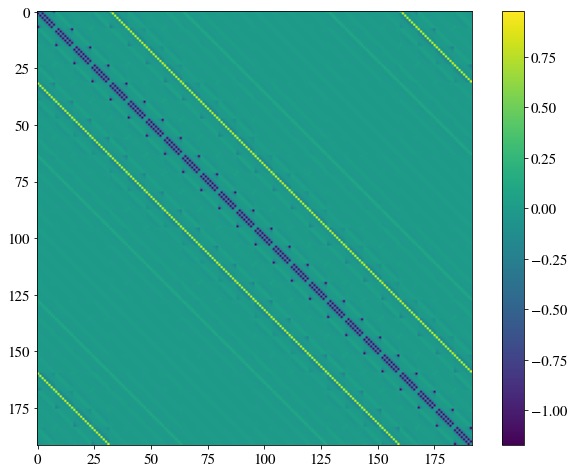

In [9]:

plt.imshow(Vij)
plt.colorbar()
plt.show()


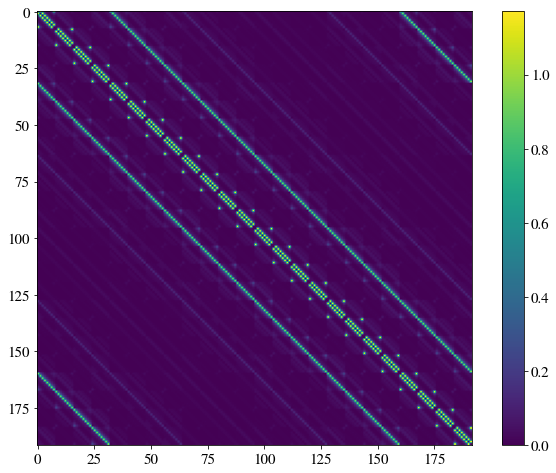

<Figure size 792x576 with 0 Axes>

In [10]:


plt.imshow(abs(Vij))
plt.colorbar()
plt.show()

plt.savefig('foo.png')
plt.savefig('foo.pdf')

In [11]:

def index_Gij(arr,Atom_cutoff):
    
    Ordered_N = list(np.argsort(arr)[::-1][:Atom_cutoff])
    
    return Ordered_N

# Provides a list of lists with the arrays that belong to each cluster


Index_N=[]

Rem_iden=abs(Vij)


for j in range(Rem_iden.shape[0]):
    
    test_list = list(Rem_iden[j])
    
    Index_N.append( [j]+list(index_Gij(test_list,Atom_cutoff-1))  )

In [12]:
#https://easyspin.org/easyspin/documentation/spinoperators.html


#Define Sz

Val=np.linspace(-S_spin,S_spin,int(2*S_spin+1))
Coord=np.linspace(0,2*S_spin,int(2*S_spin+1))
    
Sz_sp=sparse.coo_matrix((Val,(Coord,Coord)),shape=(int(2*S_spin+1),int(2*S_spin+1)),dtype="complex") 

In [13]:
#Define Splus

Val=[]


for j in range(1,int(2*S_spin)+1):
    
    Val.append(sqrt((S_spin)*(S_spin+1)-(S_spin-j)*(S_spin+1-j)))
    

Coord=np.linspace(0,int(2*S_spin)-1,int(2*S_spin))    
Splu_sp=(sparse.coo_matrix((Val,(Coord,Coord+1)),shape=(int(2*S_spin)+1,int(2*S_spin)+1),dtype="complex")) 

Sx_sp=(Splu_sp+Splu_sp.T)/2
Sy_sp=(Splu_sp-Splu_sp.T)/(2j)



In [14]:
#Initial state |S,-S>
Init_st=(sparse.coo_matrix(([1],([Levels-1],[0])),shape=(int(2*S_spin)+1,1),dtype="complex")) 

#Rotated initial state

Init_st_rot=(expm(scipy.sparse.csc_matrix(-1j*(np.pi/2)*Sy_sp))@Init_st)

In [15]:
Id_Spin=scipy.sparse.identity(Levels, dtype='complex')

Zero_Spin=0*Id_Spin


def Zeeman_Popul(m_s):
    
    return sparse.coo_matrix(([1],([S_spin-m_s],[S_spin-m_s])),shape=(Levels,Levels),dtype="complex")

In [16]:
Init_st_rot.toarray()

array([[ 0.125     +0.j],
       [-0.30618622+0.j],
       [ 0.48412292+0.j],
       [-0.55901699+0.j],
       [ 0.48412292+0.j],
       [-0.30618622+0.j],
       [ 0.125     +0.j]])

In [17]:
Init_st_rot

<7x1 sparse matrix of type '<class 'numpy.complex128'>'
	with 7 stored elements in Compressed Sparse Column format>

In [18]:
Init_Total_rot=Init_st_rot

for j in range(Atom_cutoff-1):
    
    Init_Total_rot=kron(Init_Total_rot,Init_st_rot)
    

In [19]:
Init_Total_rot=coo_matrix(Init_Total_rot)  #Initial state wavefunction

In [20]:
Init_Total_rot.todense()

matrix([[ 0.015625  +0.j],
        [-0.03827328+0.j],
        [ 0.06051536+0.j],
        [-0.06987712+0.j],
        [ 0.06051536+0.j],
        [-0.03827328+0.j],
        [ 0.015625  +0.j],
        [-0.03827328+0.j],
        [ 0.09375   +0.j],
        [-0.14823177+0.j],
        [ 0.1711633 +0.j],
        [-0.14823177+0.j],
        [ 0.09375   +0.j],
        [-0.03827328+0.j],
        [ 0.06051536+0.j],
        [-0.14823177+0.j],
        [ 0.234375  +0.j],
        [-0.27063294+0.j],
        [ 0.234375  +0.j],
        [-0.14823177+0.j],
        [ 0.06051536+0.j],
        [-0.06987712+0.j],
        [ 0.1711633 +0.j],
        [-0.27063294+0.j],
        [ 0.3125    +0.j],
        [-0.27063294+0.j],
        [ 0.1711633 +0.j],
        [-0.06987712+0.j],
        [ 0.06051536+0.j],
        [-0.14823177+0.j],
        [ 0.234375  +0.j],
        [-0.27063294+0.j],
        [ 0.234375  +0.j],
        [-0.14823177+0.j],
        [ 0.06051536+0.j],
        [-0.03827328+0.j],
        [ 0.09375   +0.j],
 

In [21]:
Iden_Tensor=coo_matrix(identity((Levels)**Atom_cutoff, dtype='complex'))
Zero_Tensor=0*Iden_Tensor

In [22]:
import functools as ft
from functools import reduce

lst = Atom_cutoff*[Id_Spin]
XX = reduce(kron, lst)

In [23]:
#pip install pympler

In [24]:
def A_i_tensor(A_op,i_index):
    
    Array_id=Atom_cutoff*[Id_Spin] 
    
    Array_id[i_index]=A_op
    
    return reduce(kron, Array_id)
    

In [25]:
#Not needed, just for reference

def tensor_kjXYZ2( k , j):   #tensor among k,j are Positions in the cluster after the G classification
                         #k is +sigma and j is -sigma
        
    Array_idX   = Atom_cutoff*[Id_Spin]   
    Array_idX[k]= Sx_sp
    Array_idX[j]= Sx_sp
    
    Array_idY   = Atom_cutoff*[Id_Spin]
    Array_idY[k]= Sy_sp
    Array_idY[j]= Sy_sp
    
    Array_idZ   = Atom_cutoff*[Id_Spin]
    Array_idZ[k]= Sz_sp
    Array_idZ[j]= Sz_sp

    return reduce(kron, Array_idX),reduce(kron, Array_idY),reduce(kron, Array_idZ) 



In [26]:
def tensor_termIntact( k , j):   #tensor among k,j are Positions in the cluster after the G classification
                         #k is +sigma and j is -sigma
        
    Array_idX   = Atom_cutoff*[Id_Spin]   
    Array_idX[k]= Sx_sp
    Array_idX[j]= Sx_sp
    
    Array_idY   = Atom_cutoff*[Id_Spin]
    Array_idY[k]= Sy_sp
    Array_idY[j]= Sy_sp
    
    Array_idZ   = Atom_cutoff*[Id_Spin]
    Array_idZ[k]= Sz_sp
    Array_idZ[j]= Sz_sp

    return reduce(kron, Array_idZ)-0.5*( reduce(kron, Array_idX)+reduce(kron, Array_idY) ) 



In [27]:
#Not needed, just for reference

def tensor_kjXX( k , j):   #tensor among k,j are Positions in the cluster after the G classification
                         #k is +sigma and j is -sigma 
    Array_id=Atom_cutoff*[Id_Spin]  
    
    Array_id[k]=Sx_sp
    Array_id[j]=Sx_sp

    return reduce(kron, Array_id)



def tensor_kjYY( k , j):   #tensor among k,j are Positions in the cluster after the G classification
                         #k is +sigma and j is -sigma 
    Array_id=Atom_cutoff*[Id_Spin]  
    
    Array_id[k]=Sy_sp
    Array_id[j]=Sy_sp

    return reduce(kron, Array_id)



def tensor_kjZZ( k , j):   #tensor among k,j are Positions in the cluster after the G classification
                         #k is +sigma and j is -sigma 
    Array_id=Atom_cutoff*[Id_Spin]  
    
    Array_id[k]=Sz_sp
    Array_id[j]=Sz_sp

    return reduce(kron, Array_id)



In [28]:
Sz_cuad=Sz_sp@Sz_sp

In [29]:
def tensor_k_Zcuad( k ):  #Excited state k is a Position in the cluster after the G classification
    
    Array_id=Atom_cutoff*[Id_Spin]  
    
    Array_id[k]=Sz_cuad
        
    return reduce(kron, Array_id)

In [30]:
# Construct a vector with |C_i| elements equal to A_i_tensor(Sz_cuad,j)

Sz_cuad_array=Zero_Tensor


for j in range(Atom_cutoff):
    
    Sz_cuad_array+= B_Q* A_i_tensor(Sz_cuad,j)
    



\begin{align}
\hat{H}_{{\rm MACE}}^{i} & =\sum_{k\in C_{i}}B_{Q}\hat{s}_{z,k}^{2}+\sum_{\substack{j,k\in C_{i},\\
j<k
}
}V_{jk}\left(\hat{s}_{z,j}\hat{s}_{z,k}-\frac{1}{2}\left(\hat{s}_{x,j}\hat{s}_{x,k}+\hat{s}_{y,j}\hat{s}_{y,k}\right)\right).
\end{align}


In [31]:

#@jit
def Hamilt_ic(index_center):
     
    Index_list=Index_N[index_center]
    Hamil=Sz_cuad_array
    
    
    for j in range(Atom_cutoff):
        
        IL_j   = Index_list[j]
        
        for k in range(j+1,Atom_cutoff):
            
            
            IL_k   = Index_list[k]

            Ten_jk = tensor_termIntact( j , k)

            
            Hamil=Hamil+ Vij[IL_j,IL_k]*Ten_jk
            
            #print(j,k,"IndexN", IL_j,IL_k)
            

    return  Hamil



In [32]:

#@jit
def f(t, yR,M_vect,b):

    return -1j*M_vect@yR

In [33]:
import matplotlib.pyplot as plt
import numpy as np
#from google.colab import files

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin

label_size = 20

from numpy import sqrt

import time
from numba import jit
from numpy import sin, cos

T0=time.time()

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

In [34]:
Zeeman_Operators=[]


for j in range(-S_spin,S_spin+1):
    
    Zeeman_Operators.append(A_i_tensor(Zeeman_Popul( -j),0))
    

In [35]:
tspan=np.linspace(0,2,400)



from scipy.integrate import solve_ivp

In [36]:
T_init=tspan[0]

T_fin =tspan[-1]

In [37]:
from scipy.integrate import solve_ivp


def Dynam_Popul_CI(index_center):
    
    Populations=np.zeros((Levels,len(tspan)))
    

    #sol = solve_ivp(f, [tspan[0], tspan[-1]], list(Init_Total_rot.toarray().T[0]),args=(Hamilt_ic(index_center),None),dense_output=True )
    sol = solve_ivp(f, [T_init, T_fin], list(Init_Total_rot.toarray().T[0]),args=(Hamilt_ic(index_center),None),dense_output=True,max_step=0.0001 )

    Sol_dense=sol.sol(tspan)
    
    
    for j in range(Levels):
        
        Populations[j]=real((diag((conj(Sol_dense.T)@(Zeeman_Operators[j]@Sol_dense)))))
        
        
    return Populations

    


In [38]:
Populat_Fin=np.zeros((Levels,len(tspan)))

In [39]:
Populat_Fin=Dynam_Popul_CI(0) #any number is ok for the argument

In [40]:
VarL=(3**2)*Populat_Fin[0]
VarL=VarL+(2**2)*Populat_Fin[1]
VarL=VarL+(1**2)*Populat_Fin[2]
VarL=VarL+(0**2)*Populat_Fin[3]
VarL=VarL+((-1)**2)*Populat_Fin[4]
VarL=VarL+((-2)**2)*Populat_Fin[5]
VarL=VarL+((-3)**2)*Populat_Fin[6]

In [41]:
Atom_cutoff

2

In [42]:
#CorrT2=N_atom*(S_spin/2-VarL)
#CorrT3=N_atom*(S_spin/2-VarL)
#CorrT4=N_atom*(S_spin/2-VarL)
CorrT5=N_atom*(S_spin/2-VarL)
#CorrT6=S_spin/2-VarL

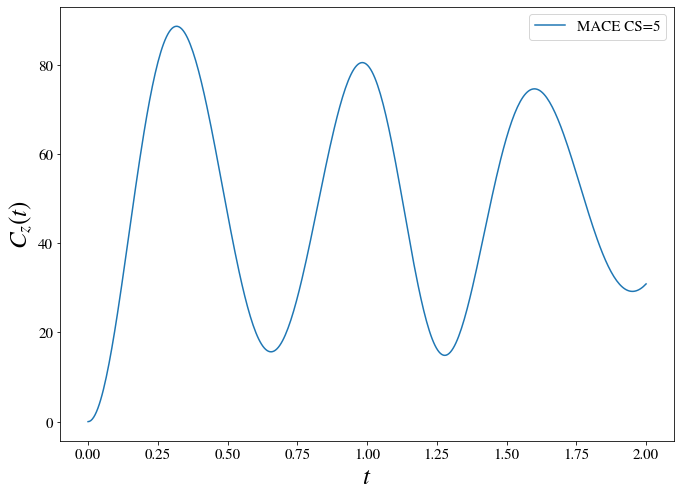

In [43]:
#plt.title("$C_z\\left(t\\right)$")


#plt.plot(tspan,CorrT2,label="MACE CS=2")
#plt.plot(tspan,CorrT3,label="MACE CS=3")
#plt.plot(tspan,CorrT4,label="MACE CS=4")
plt.plot(tspan,CorrT5,label="MACE CS=5")
#plt.plot(CorrT6,label="MACE CS=6")


plt.xlabel("$ t $",fontsize=25)
plt.ylabel("$ C_z\\left(t\\right)  $",fontsize=25)

plt.legend()

# CMFT

In [44]:
#(Vij@Mean_Val_XYZ)


OperX=[]
OperY=[]
OperZ=[]


for j in range(Atom_cutoff):
    
    
    OperX.append( A_i_tensor(Sx_sp,j) )
    OperY.append( A_i_tensor(Sy_sp,j) )
    OperZ.append( A_i_tensor(Sz_sp,j) )


\begin{align*}
\hat{H}_{{\rm CMFT}}^{i} & =\sum_{k\in C_{i}}B_{Q}\hat{s}_{z,k}^{2}+\sum_{\substack{j,k\in C_{i},\\
j<k
}
}V_{jk}\left(\hat{s}_{z,j}\hat{s}_{z,k}-\frac{1}{2}\left(\hat{s}_{x,j}\hat{s}_{x,k}+\hat{s}_{y,j}\hat{s}_{y,k}\right)\right)+\sum_{\substack{j\in C_{i},}
}\left(\hat{s}_{z,j}\vec{V}_{j}\cdot\left\langle \vec{\hat{s}_{z}}\right\rangle -\frac{1}{2}\left(\hat{s}_{x,j}\vec{V}_{j}\cdot\left\langle \vec{\hat{s}_{x}}\right\rangle +\hat{s}_{y,j}\vec{V}_{j}\cdot\left\langle \vec{\hat{s}_{y}}\right\rangle \right)\right)\\
 & \,\,\,\,\,-\sum_{\substack{j,k\in C_{i}}
}V_{jk}\left(\hat{s}_{z,j}\left\langle \hat{s}_{z,k}\right\rangle -\frac{1}{2}\left(\hat{s}_{x,j}\left\langle \hat{s}_{x,k}\right\rangle +\hat{s}_{y,j}\left\langle \hat{s}_{y,k}\right\rangle \right)\right).
\end{align*}

In [45]:
Init_Total_rot

<49x1 sparse matrix of type '<class 'numpy.complex128'>'
	with 49 stored elements in COOrdinate format>

In [46]:
len(tnew)+1

NameError: name 'tnew' is not defined

In [47]:

number_parts=60


index_parts=int(len(tspan)/number_parts)

tnew=[]

for tind_ in range(len(tspan)-1):

    Time_pos=int((tind_+1)//index_parts)
    
    if (tind_+1)%index_parts==0:
        
        tnew.append(tspan[tind_+1])

tnew=array(tnew)





In [48]:


#@jit
def Hamilt_ic_MACE(index_center):
     
    Index_list=Index_N[index_center]
    Hamil=Sz_cuad_array
    
    
    for j in range(Atom_cutoff):
        
        IL_j   = Index_list[j]
        
        for k in range(j+1,Atom_cutoff):
            
            
            IL_k   = Index_list[k]


            
            Hamil=Hamil+ Vij[IL_j,IL_k]*(tensor_termIntact( j , k) )
            
            #print(j,k,"IndexN", IL_j,IL_k)
            

    return  Hamil

In [49]:
#@jit
def Hamilt_ic_CMFT(index_center,VdotXYZ=Vj_dot_MV_XYZ,ArrayXYZ=Mean_Val_XYZ):
     
    Index_list=Index_N[index_center]
    Hamil=Zero_Tensor
    
    
    for j in range(Atom_cutoff):
        
        IL_j   = Index_list[j]
        

        VjX,VjY,VjZ=VdotXYZ[IL_j]
        
        hat_Sxj=OperX[j]
        hat_Syj=OperY[j]
        hat_Szj=OperZ[j]
        
        Hamil=Hamil+ (VjZ*hat_Szj - 0.5*( VjX * hat_Sxj + VjY * hat_Syj   ) )
    
    
        for k in range(Atom_cutoff):
            
            IL_k   = Index_list[k]
                    
            sxk,syk,szk = ArrayXYZ[IL_k] 
            
            MF_termJK = szk*hat_Szj - 0.5 * ( sxk * hat_Sxj + syk * hat_Syj )
            
            Hamil=Hamil - Vij[IL_j,IL_k]*   MF_termJK  
            
            #print(j,k,"IndexN", IL_j,IL_k)
            

    return  Hamil

NameError: name 'Vj_dot_MV_XYZ' is not defined

In [ ]:

def Wave_func_part(Wave_fun_mt,inst_time,VdotXYZ,ArrayXYZ):
    
    Result_fin=np.zeros(((Levels**Atom_cutoff),N_atom),dtype=complex)
    

    for cent_ind in range(N_atom):
        
        
        
        #Mat_dyn=Time_ind_hamil[cent_ind]   #+Part_time_dep(cent_ind,inst_time)
        
        Mat_dyn=Hamilt_ic_MACE(cent_ind)+Hamilt_ic_CMFT(cent_ind,VdotXYZ,ArrayXYZ)
        
        sol_cent_ind = solve_ivp(f,[tspan[inst_time],tspan[inst_time+1]],list(Wave_fun_mt[:,cent_ind])
                                 ,args=(Mat_dyn,None),dense_output=False,max_step=0.0001)# , t_eval= [tspan[inst_time+1]])
        
        
        
        Result_fin[:,cent_ind]=((sol_cent_ind.y)[:,-1]).reshape((Levels**Atom_cutoff,))
        
        #print(cent_ind)
        #print(cent_ind/N_atom)
        
    return Result_fin



In [ ]:

# Wavefunction saving

Wave_function=np.zeros((Levels**Atom_cutoff,N_atom),dtype="complex")

for j in range(N_atom):    
    Wave_function[:,j]=Init_Total_rot.toarray().reshape(Levels**Atom_cutoff,)   #Not sparse structure because the state is not sparse
    

Mean_Val_XYZ=np.zeros((N_atom,3),dtype="complex")

Mean_Val_XYZ[:,0]=diag(conj(Wave_function.T)@(OperX[0]@Wave_function))
Mean_Val_XYZ[:,1]=diag(conj(Wave_function.T)@(OperY[0]@Wave_function))
Mean_Val_XYZ[:,2]=diag(conj(Wave_function.T)@(OperZ[0]@Wave_function))

Vj_dot_MV_XYZ=Vij@Mean_Val_XYZ

Popul_CMFT=np.zeros((2*S_spin+1,len(tnew)+1),dtype=complex)



for j in range(2*S_spin+1):
    Popul_CMFT[j,0]=sum(diag(conj(Wave_function.T)@(Zeeman_Operators[j]@Wave_function)))/N_atom

In [ ]:
count=0

tNEW=[0]

for tind_ in range(len(tspan)-1):
    
    Wave_function= Wave_func_part(Wave_function,tind_,Vj_dot_MV_XYZ,Mean_Val_XYZ)
    
    
    if (tind_+1)%index_parts==0:
        count=count+1
        
        tNEW.append(tspan[tind_+1])
        
        for j in range(7):
            Popul_CMFT[j,count]=sum(diag(conj(Wave_function.T)@(Zeeman_Operators[j]@Wave_function)))/N_atom
        
        #Popul_CMFT[j,count]=sum(diag(conj(Wave_function.T)@(Zeeman_Operators[j]@Wave_function)))

        #print(100*(tind_+1)/len(tspan))
        
    print((100*tind_/(len(tspan)-1)),"%")
        
    Mean_Val_XYZ=np.zeros((N_atom,3),dtype="complex")
    Mean_Val_XYZ[:,0]=diag(conj(Wave_function.T)@(OperX[0]@Wave_function))
    Mean_Val_XYZ[:,1]=diag(conj(Wave_function.T)@(OperY[0]@Wave_function))
    Mean_Val_XYZ[:,2]=diag(conj(Wave_function.T)@(OperZ[0]@Wave_function))
        
    Vj_dot_MV_XYZ=Vij@Mean_Val_XYZ

In [ ]:
VarLCMF=(3**2)*Popul_CMFT[0]
VarLCMF=VarLCMF+(2**2)*Popul_CMFT[1]
VarLCMF=VarLCMF+(1**2)*Popul_CMFT[2]
VarLCMF=VarLCMF+(0**2)*Popul_CMFT[3]
VarLCMF=VarLCMF+((-1)**2)*Popul_CMFT[4]
VarLCMF=VarLCMF+((-2)**2)*Popul_CMFT[5]
VarLCMF=VarLCMF+((-3)**2)*Popul_CMFT[6]

In [ ]:
N_atom

In [ ]:
CorrT2CMF=N_atom*(S_spin/2-VarLCMF)

#CorrT2CMF

In [ ]:
plt.plot(tNEW,CorrT2CMF,label="CMFT CS=3")
#plt.plot(tspan,CorrT5,label="MACE CS=5")

plt.legend()

In [ ]:
len(tNEW)

In [ ]:
CMFT2_Single=array([-1.27897692e-13+0.j,  2.14532349e+00+0.j,  8.33672264e+00+0.j,
        1.78802908e+01+0.j,  2.97415504e+01+0.j,  4.26977883e+01+0.j,
        5.55010572e+01+0.j,  6.70212849e+01+0.j,  7.63492724e+01+0.j,
        8.28528721e+01+0.j,  8.61913144e+01+0.j,  8.62992762e+01+0.j,
        8.33533629e+01+0.j,  7.77309122e+01+0.j,  6.99669307e+01+0.j,
        6.07114724e+01+0.j,  5.06875785e+01+0.j,  4.06488437e+01+0.j,
        3.13354157e+01+0.j,  2.34278032e+01+0.j,  1.74995090e+01+0.j,
        1.39721028e+01+0.j,  1.30789603e+01+0.j,  1.48449091e+01+0.j,
        1.90870792e+01+0.j,  2.54373533e+01+0.j,  3.33807479e+01+0.j,
        4.22998359e+01+0.j,  5.15155321e+01+0.j,  6.03197357e+01+0.j,
        6.80031791e+01+0.j,  7.38881781e+01+0.j,  7.73767573e+01+0.j,
        7.80182775e+01+0.j,  7.55892636e+01+0.j,  7.01666597e+01+0.j,
        6.21698874e+01+0.j,  5.23504034e+01+0.j,  4.17195854e+01+0.j,
        3.14225340e+01+0.j,  2.25806741e+01+0.j,  1.61345793e+01+0.j,
        1.27178458e+01+0.j,  1.25842315e+01+0.j,  1.55972547e+01+0.j,
        2.12782194e+01+0.j,  2.88983634e+01+0.j,  3.75949462e+01+0.j,
        4.64896396e+01+0.j,  5.47899739e+01+0.j,  6.18601384e+01+0.j,
        6.72552950e+01+0.j,  7.07223133e+01+0.j,  7.21772938e+01+0.j,
        7.16740021e+01+0.j,  6.93758622e+01+0.j,  6.55379153e+01+0.j,
        6.04968316e+01+0.j,  5.46606232e+01+0.j,  4.84884172e+01+0.j,
        4.24553664e+01+0.j,  3.70061757e+01+0.j,  3.25084147e+01+0.j,
        2.92194685e+01+0.j,  2.72768161e+01+0.j,  2.67120304e+01+0.j,
        2.74789717e+01+0.j])

In [ ]:
plt.plot(tNEW,CorrT2CMF,label="CMFT CS=2")
plt.plot(tNEW,CMFT2_Single,label="CMFT Single CS=2")

#plt.plot(tspan,CorrT5,label="MACE CS=5")

plt.legend()

In [ ]:
count=0

Arr=[count]
for tind_ in range(len(tspan)):
    
    if (tind_+1)%index_parts==0:
        count=count+1
        
        Arr.append(count)
        
        
        
        

In [ ]:
len(Arr)

In [ ]:
Popul_CMFT.shape

In [ ]:
Newoi

In [ ]:
Hamilt_ic(0)-Hamilt_ic(10)

In [ ]:
Index_N[0]

In [ ]:
(sol1.y).shape

In [ ]:
  
Sol_dense=(sol1.sol(tspan))


In [ ]:
conj(1j)

In [ ]:
#Id_Spin

for j in range(-3,4):
    
    plt.plot(real((diag((conj(Sol_dense.T)@(A_i_tensor(Zeeman_Popul(j),0)@Sol_dense))))),label=str(j))
    
plt.legend()

In [ ]:
j=3

plt.plot(real((diag((conj(Sol_dense.T)@(A_i_tensor(Zeeman_Popul(j),0)@Sol_dense))))),"--",label=str(j))

j=2

plt.plot(real((diag((conj(Sol_dense.T)@(A_i_tensor(Zeeman_Popul(j),0)@Sol_dense))))),"--",label=str(j))


j=1

plt.plot(real((diag((conj(Sol_dense.T)@(A_i_tensor(Zeeman_Popul(j),0)@Sol_dense))))),"--",label=str(j))

j=0

plt.plot(real((diag((conj(Sol_dense.T)@(A_i_tensor(Zeeman_Popul(j),0)@Sol_dense))))),"--",label=str(j))

j=-1

plt.plot(real((diag((conj(Sol_dense.T)@(A_i_tensor(Zeeman_Popul(j),0)@Sol_dense))))),".",label=str(j))

j=-2

plt.plot(real((diag((conj(Sol_dense.T)@(A_i_tensor(Zeeman_Popul(j),0)@Sol_dense))))),".",label=str(j))

j=-3

plt.plot(real((diag((conj(Sol_dense.T)@(A_i_tensor(Zeeman_Popul(j),0)@Sol_dense))))),".",label=str(j))


plt.legend()

In [ ]:
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [ ]:
#Changeeee

In [ ]:
Sigma_EG=array(tensor_k(0).todense())
Sigma_EE=array(tensor_k_ee(0).todense())

#S_eg=array(Sigma_eg.todense())
#S_ee=array(Sigma_ee.todense())

In [ ]:
Sigma_eg

In [ ]:
dot(Sigma_EE.flatten(),(sol.y)[:,0])

In [ ]:
Atom_cutoff

In [ ]:
N_atom

In [ ]:
tensor_k(0)

In [ ]:
Splus_i=[]
See_i  =[]

Y_array=Sol_dense

for j in range((Y_array).shape[1]):
    
    See=dot(Sigma_EE.flatten(),(Y_array)[:,j])
    Seg=dot(Sigma_EG.flatten(),(Y_array)[:,j])
    
    
    See_i.append(See)
    
    Splus_i.append(Seg)
    
    


In [ ]:

#plt.plot(tspan,2*np.real(Splus_i),label="$\\left<\hat{\sigma}_i^x\\right>$")

#plt.plot(tspan,np.ones((tspan.shape)))
#plt.plot(tspan,0*np.ones((tspan.shape)))


#plt.plot(tspan,2*np.imag(Splus_i),label="$\\left<\hat{\sigma}_i^y\\right>$")
#plt.plot(tspan,-sin(2*Omega*tspan),"-|")

#plt.plot(tspan,(sin(Omega*tspan))**2,"->")
plt.plot(tspan,np.real(See_i),label="$\\left<\hat{\sigma}_i^{ee}\\right>$")
#plt.plot(tspan, EE0,"--")
plt.axvline(x=np.pi/4, color='b')

#plt.xscale("log")

plt.legend()

In [ ]:
Splus_ar=array(Splus_i)
See_ar  =array(See_i)


from numpy import add

@jit
def SplusSee_center_ind(cent_ind):
    
    
    sol = solve_ivp(f, [tspan[0], tspan[-1]], list(array((Init_rho.todense()).T,dtype="complex")[0])
                     ,args=(Part_H_L_R_LR(cent_ind),None),dense_output=True )
    
    
    Sol_dense=(sol.sol(tspan))
    
    
    
    
    
    
    Splus_i=[]
    See_i  =[]

    Y_array=Sol_dense

    for j in range((Y_array).shape[1]):
    
        See=dot(Sigma_EE.flatten(),(Y_array)[:,j])
        Seg=dot(Sigma_EG.flatten(),(Y_array)[:,j])
    
    
        See_i.append(See)
    
        Splus_i.append(Seg)
    
    

    
    
    
    
    return Splus_i, See_i
    

Array_0=SplusSee_center_ind(0)

Splus=array(Array_0[0])
See_r=array(Array_0[1])


for j in range(1,N_atom):
    
    Array_j=SplusSee_center_ind(j)
    
    Splus_j=array(Array_j[0])
    See_r_j=array(Array_j[1])
    
    Splus=Splus+Splus_j
    See_r=See_r+See_r_j
    
    print(j)
    

In [ ]:
Pos_atoms

In [ ]:
Atom_cutoff

In [ ]:
#See2=np.real(See_r)

In [ ]:
#See3=np.real(See_r)

In [ ]:
#See4=np.real(See_r)

In [ ]:
#See5=np.real(See_r)

In [ ]:
#See6=np.real(See_r)

In [ ]:
Atom_cutoff

In [ ]:
#See2G  = See_r
#Splus2G= Splus



In [ ]:
See6G  = See_r
Splus6G= Splus



In [ ]:
Omega

In [ ]:
Atom_cutoff

In [ ]:
plt.plot(tspan,real(See6G) )
plt.plot(tspan,real(Splus6G) )
plt.plot(tspan,imag(Splus6G) )


In [ ]:
df1=pd.read_csv('Total_exc0,1.txt')  


In [ ]:
Exc_MF=array(df1)


plt.title("Excited Population Dynamics")

plt.plot(Exc_MF[:,0],Exc_MF[:,1],label="MF estimation")
#plt.plot(tspan,real(See2G) ,label="MACE estimation, Cluster size 2")
#plt.plot(tspan,real(See5G) ,label="MACE estimation, Cluster size 5")
plt.plot(tspan,real(See6G) ,label="MACE estimation, Cluster size 6")


plt.xlabel("$\Gamma t$",fontsize=25)

plt.ylabel("$n_{\\rm{ee}}(t)$",fontsize=25)

plt.legend()

In [ ]:
j_ind=100


Array_j=SplusSee_center_ind(j_ind)

Splus=array(Array_0[0])
See_r=array(Array_0[1])

In [ ]:
plt.plot(tspan,real(See_r))
plt.plot(tspan,real(Splus))
plt.plot(tspan,imag(Splus))

In [ ]:
for j in range(N_atom):

    Array_j=SplusSee_center_ind(j)

    Splus=array(Array_j[0])
    See_r=array(Array_j[1])
    #plt.plot(tspan,2*np.real(Splus),label="$\\left<\hat{\sigma}_i^x\\right>$")
    #plt.plot(tspan,2*np.imag(Splus),label="$\\left<\hat{\sigma}_i^y\\right>$")

    plt.plot(tspan,np.real(See_r),label="$\\left<\hat{\sigma}_i^{ee}\\right>$")

    #plt.legend()

    

In [ ]:
100//6

In [ ]:
Sampl=12


for j in range(N_atom//Sampl):
    
    Index=j*Sampl

    Array_j=SplusSee_center_ind(j)

    Splus=array(Array_j[0])
    See_r=array(Array_j[1])
    #plt.plot(tspan,2*np.real(Splus),label="$\\left<\hat{\sigma}_i^x\\right>$")
    #plt.plot(tspan,2*np.imag(Splus),label="$\\left<\hat{\sigma}_i^y\\right>$")

    plt.plot(tspan,np.real(See_r),label="$\\left<\hat{\sigma}_i^{ee}\\right>$")

    #plt.legend()

    

In [ ]:
N_atom//Sampl

In [ ]:
j=150

Index=j*Sampl

Array_j=SplusSee_center_ind(j)

Splus=array(Array_j[0])
See_r=array(Array_j[1])
plt.plot(tspan,np.real(See_r),label="$\\left<\hat{\sigma}_i^{ee}\\right>$")

j=4

Index=j*Sampl

Array_j=SplusSee_center_ind(j)

Splus=array(Array_j[0])
See_r=array(Array_j[1])
#plt.plot(tspan,2*np.real(Splus),label="$\\left<\hat{\sigma}_i^x\\right>$")
#plt.plot(tspan,2*np.imag(Splus),label="$\\left<\hat{\sigma}_i^y\\right>$")

plt.plot(tspan,np.real(See_r),label="$\\left<\hat{\sigma}_i^{ee}\\right>$")

In [ ]:
plt.title(" N=1000, $\Omega=2\Gamma$ ",  )


plt.plot(tspan,See2,label="$\\left<\hat{S}_z\\right>$ MACE 2 Collective")
plt.plot(tspan,See3,label="$\\left<\hat{S}_z\\right>$ MACE 3 Collective")
plt.plot(tspan,See4,label="$\\left<\hat{S}_z\\right>$ MACE 4 Collective")
plt.plot(tspan,See5,label="$\\left<\hat{S}_z\\right>$ MACE 5 Collective")
plt.plot(tspan,See6,label="$\\left<\hat{S}_z\\right>$ MACE 6 Collective")

plt.plot(tspan,See2G,"--",label="$\\left<\hat{S}_z\\right>$ MACE 2 General")
plt.plot(tspan,See3G,"--",label="$\\left<\hat{S}_z\\right>$ MACE 3 General")
plt.plot(tspan,See4G,"--",label="$\\left<\hat{S}_z\\right>$ MACE 4 General")
plt.plot(tspan,See5G,"--",label="$\\left<\hat{S}_z\\right>$ MACE 5 General")
plt.plot(tspan,See6G,"--",label="$\\left<\hat{S}_z\\right>$ MACE 6 General")

plt.xlabel("$\Gamma t$",fontsize=20)

plt.ylabel("$\\left<\hat{S}_{\\alpha}\\right>$",fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

In [ ]:

plt.plot(tspan,See2,label="$\\left<\hat{S}_z\\right>$ MACE 2 Collective")
plt.plot(tspan,See3,label="$\\left<\hat{S}_z\\right>$ MACE 3 Collective")
plt.plot(tspan,See4,label="$\\left<\hat{S}_z\\right>$ MACE 4 Collective")
plt.plot(tspan,See5,label="$\\left<\hat{S}_z\\right>$ MACE 5 Collective")
plt.plot(tspan,See6,label="$\\left<\hat{S}_z\\right>$ MACE 6 Collective")

plt.plot(tspan,See2G,"--",label="$\\left<\hat{S}_z\\right>$ MACE 2 General")
plt.plot(tspan,See3G,"--",label="$\\left<\hat{S}_z\\right>$ MACE 3 General")
plt.plot(tspan,See4G,"--",label="$\\left<\hat{S}_z\\right>$ MACE 4 General")
plt.plot(tspan,See5G,"--",label="$\\left<\hat{S}_z\\right>$ MACE 5 General")
plt.plot(tspan,See6G,"--",label="$\\left<\hat{S}_z\\right>$ MACE 6 General")

plt.xlabel("$\Gamma t$")

plt.ylabel("$\\left<\hat{S}_{\\alpha}\\right>$")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

In [ ]:


plt.plot(tspan,See2G,"--",label="$\\left<\hat{S}_z\\right>$ MACE 2 General")
plt.plot(tspan,See3G,"--",label="$\\left<\hat{S}_z\\right>$ MACE 3 General")
plt.plot(tspan,See4G,"--",label="$\\left<\hat{S}_z\\right>$ MACE 4 General")
plt.plot(tspan,See5G,"--",label="$\\left<\hat{S}_z\\right>$ MACE 5 General")
plt.plot(tspan,See6G,"--",label="$\\left<\hat{S}_z\\right>$ MACE 6 General")

plt.xlabel("$\Gamma t$")

plt.ylabel("$\\left<\hat{S}_{\\alpha}\\right>$")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

In [ ]:

plt.plot(tspan,See2,label="$\\left<\hat{S}_z\\right>$ MACE 2 Collective")
plt.plot(tspan,See3,label="$\\left<\hat{S}_z\\right>$ MACE 3 Collective")
plt.plot(tspan,See4,label="$\\left<\hat{S}_z\\right>$ MACE 4 Collective")
plt.plot(tspan,See5,label="$\\left<\hat{S}_z\\right>$ MACE 5 Collective")
plt.plot(tspan,See6,label="$\\left<\hat{S}_z\\right>$ MACE 6 Collective")



plt.xlabel("$\Gamma t$")

plt.ylabel("$\\left<\hat{S}_{\\alpha}\\right>$")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

In [ ]:
# EH

In [ ]:
plt.plot(tspan,np.real(Splus),label="$\\left<\hat{S}_x\\right>$ MACE")
plt.plot(tspan,np.imag(Splus),label="$\\left<\hat{S}_y\\right>$ MACE")
plt.plot(tspan,np.real(See_r)-N_atom/2,label="$\\left<\hat{S}_z\\right>$ MACE")

plt.xlabel("$\Gamma t$")

plt.ylabel("$\\left<\hat{S}_{\\alpha}\\right>$")

plt.legend()

In [ ]:

plt.plot(tspan,np.real(See_r),label="$\\left<\hat{S}_z\\right>$ MACE")

plt.xlabel("$\Gamma t$")

plt.ylabel("$\\left<\hat{S}_{\\alpha}\\right>$")

plt.legend()

In [ ]:
Omega

In [ ]:
N_atom

In [ ]:
Sx5C=np.real(Splus)
Sy5C=np.imag(Splus)
Sz5C=np.real(See_r)-N_atom/2

In [ ]:
#Sx5G=np.real(Splus)
#Sy5G=np.imag(Splus)
#Sz5G=np.real(See_r)-N_atom/2

In [ ]:
Collect

In [ ]:
Atom_cutoff

In [ ]:
N_atom

In [ ]:
fontsize=30

plt.title("Single Operators Dynamics under MACE",fontsize=fontsize)

plt.plot(tspan,Sx2G,"-",label="$\\left<\hat{S}_x\\right>$ MACE 2G")
plt.plot(tspan,Sy2G,"-",label="$\\left<\hat{S}_y\\right>$ MACE 2G")
plt.plot(tspan,Sz2G,"-",label="$\\left<\hat{S}_z\\right>$ MACE 2G")

plt.plot(tspan,Sx2C,"--",label="$\\left<\hat{S}_x\\right>$ MACE 2C")
plt.plot(tspan,Sy2C,"--",label="$\\left<\hat{S}_y\\right>$ MACE 2C")
plt.plot(tspan,Sz2C,"--",label="$\\left<\hat{S}_z\\right>$ MACE 2C")


plt.plot(tspan,Sx3G,"-",label="$\\left<\hat{S}_x\\right>$ MACE 3G")
plt.plot(tspan,Sy3G,"-",label="$\\left<\hat{S}_y\\right>$ MACE 3G")
plt.plot(tspan,Sz3G,"-",label="$\\left<\hat{S}_z\\right>$ MACE 3G")

plt.plot(tspan,Sx3C,"--",label="$\\left<\hat{S}_x\\right>$ MACE 3C")
plt.plot(tspan,Sy3C,"--",label="$\\left<\hat{S}_y\\right>$ MACE 3C")
plt.plot(tspan,Sz3C,"--",label="$\\left<\hat{S}_z\\right>$ MACE 3C")

plt.plot(tspan,Sx4G,"-",label="$\\left<\hat{S}_x\\right>$ MACE 4G")
plt.plot(tspan,Sy4G,"-",label="$\\left<\hat{S}_y\\right>$ MACE 4G")
plt.plot(tspan,Sz4G,"-",label="$\\left<\hat{S}_z\\right>$ MACE 4G")

plt.plot(tspan,Sx4C,"--",label="$\\left<\hat{S}_x\\right>$ MACE 4C")
plt.plot(tspan,Sy4C,"--",label="$\\left<\hat{S}_y\\right>$ MACE 4C")
plt.plot(tspan,Sz4C,"--",label="$\\left<\hat{S}_z\\right>$ MACE 4C")

plt.plot(tspan,Sx5G,"-",label="$\\left<\hat{S}_x\\right>$ MACE 5G")
plt.plot(tspan,Sy5G,"-",label="$\\left<\hat{S}_y\\right>$ MACE 5G")
plt.plot(tspan,Sz5G,"-",label="$\\left<\hat{S}_z\\right>$ MACE 5G")

plt.plot(tspan,Sx5C,"--",label="$\\left<\hat{S}_x\\right>$ MACE 5C")
plt.plot(tspan,Sy5C,"--",label="$\\left<\hat{S}_y\\right>$ MACE 5C")
plt.plot(tspan,Sz5C,"--",label="$\\left<\hat{S}_z\\right>$ MACE 5C")


plt.legend()


In [ ]:
fontsize=30

plt.title("Single Operators Dynamics under MACE",fontsize=fontsize)

plt.plot(tspan,Sx2G,"-",label="$\\left<\hat{S}_x\\right>$ MACE 2G")
#plt.plot(tspan,Sy2G,"-",label="$\\left<\hat{S}_y\\right>$ MACE 2G")
#plt.plot(tspan,Sz2G,"-",label="$\\left<\hat{S}_z\\right>$ MACE 2G")

plt.plot(tspan,Sx2C,"--",label="$\\left<\hat{S}_x\\right>$ MACE 2C")
#plt.plot(tspan,Sy2C,"--",label="$\\left<\hat{S}_y\\right>$ MACE 2C")
#plt.plot(tspan,Sz2C,"--",label="$\\left<\hat{S}_z\\right>$ MACE 2C")


plt.plot(tspan,Sx3G,"-",label="$\\left<\hat{S}_x\\right>$ MACE 3G")
#plt.plot(tspan,Sy3G,"-",label="$\\left<\hat{S}_y\\right>$ MACE 3G")
#plt.plot(tspan,Sz3G,"-",label="$\\left<\hat{S}_z\\right>$ MACE 3G")

plt.plot(tspan,Sx3C,"--",label="$\\left<\hat{S}_x\\right>$ MACE 3C")
#plt.plot(tspan,Sy3C,"--",label="$\\left<\hat{S}_y\\right>$ MACE 3C")
#plt.plot(tspan,Sz3C,"--",label="$\\left<\hat{S}_z\\right>$ MACE 3C")

plt.plot(tspan,Sx4G,"-",label="$\\left<\hat{S}_x\\right>$ MACE 4G")
#plt.plot(tspan,Sy4G,"-",label="$\\left<\hat{S}_y\\right>$ MACE 4G")
#plt.plot(tspan,Sz4G,"-",label="$\\left<\hat{S}_z\\right>$ MACE 4G")

plt.plot(tspan,Sx4C,"--",label="$\\left<\hat{S}_x\\right>$ MACE 4C")
#plt.plot(tspan,Sy4C,"--",label="$\\left<\hat{S}_y\\right>$ MACE 4C")
#plt.plot(tspan,Sz4C,"--",label="$\\left<\hat{S}_z\\right>$ MACE 4C")

plt.plot(tspan,Sx5G,"-",label="$\\left<\hat{S}_x\\right>$ MACE 5G")
#plt.plot(tspan,Sy5G,"-",label="$\\left<\hat{S}_y\\right>$ MACE 5G")
#plt.plot(tspan,Sz5G,"-",label="$\\left<\hat{S}_z\\right>$ MACE 5G")

plt.plot(tspan,Sx5C,"--",label="$\\left<\hat{S}_x\\right>$ MACE 5C")
#plt.plot(tspan,Sy5C,"--",label="$\\left<\hat{S}_y\\right>$ MACE 5C")
#plt.plot(tspan,Sz5C,"--",label="$\\left<\hat{S}_z\\right>$ MACE 5C")


plt.legend()


In [ ]:
fontsize=30

plt.title("Single Operators Dynamics under MACE",fontsize=fontsize)

#plt.plot(tspan,Sx2G,"-",label="$\\left<\hat{S}_x\\right>$ MACE 2G")
plt.plot(tspan,Sy2G,"-",label="$\\left<\hat{S}_y\\right>$ MACE 2G")
#plt.plot(tspan,Sz2G,"-",label="$\\left<\hat{S}_z\\right>$ MACE 2G")

#plt.plot(tspan,Sx2C,"--",label="$\\left<\hat{S}_x\\right>$ MACE 2C")
plt.plot(tspan,Sy2C,"--",label="$\\left<\hat{S}_y\\right>$ MACE 2C")
#plt.plot(tspan,Sz2C,"--",label="$\\left<\hat{S}_z\\right>$ MACE 2C")


#plt.plot(tspan,Sx3G,"-",label="$\\left<\hat{S}_x\\right>$ MACE 3G")
plt.plot(tspan,Sy3G,"-",label="$\\left<\hat{S}_y\\right>$ MACE 3G")
#plt.plot(tspan,Sz3G,"-",label="$\\left<\hat{S}_z\\right>$ MACE 3G")

#plt.plot(tspan,Sx3C,"--",label="$\\left<\hat{S}_x\\right>$ MACE 3C")
plt.plot(tspan,Sy3C,"--",label="$\\left<\hat{S}_y\\right>$ MACE 3C")
#plt.plot(tspan,Sz3C,"--",label="$\\left<\hat{S}_z\\right>$ MACE 3C")


#plt.plot(tspan,Sx4G,"-",label="$\\left<\hat{S}_x\\right>$ MACE 4G")
plt.plot(tspan,Sy4G,"-",label="$\\left<\hat{S}_y\\right>$ MACE 4G")
#plt.plot(tspan,Sz4G,"-",label="$\\left<\hat{S}_z\\right>$ MACE 4G")

#plt.plot(tspan,Sx4C,"--",label="$\\left<\hat{S}_x\\right>$ MACE 4C")
plt.plot(tspan,Sy4C,"--",label="$\\left<\hat{S}_y\\right>$ MACE 4C")
#plt.plot(tspan,Sz4C,"--",label="$\\left<\hat{S}_z\\right>$ MACE 4C")

#plt.plot(tspan,Sx5G,"-",label="$\\left<\hat{S}_x\\right>$ MACE 5G")
plt.plot(tspan,Sy5G,"-",label="$\\left<\hat{S}_y\\right>$ MACE 5G")
#plt.plot(tspan,Sz5G,"-",label="$\\left<\hat{S}_z\\right>$ MACE 5G")

#plt.plot(tspan,Sx5C,"--",label="$\\left<\hat{S}_x\\right>$ MACE 5C")
plt.plot(tspan,Sy5C,"--",label="$\\left<\hat{S}_y\\right>$ MACE 5C")
#plt.plot(tspan,Sz5C,"--",label="$\\left<\hat{S}_z\\right>$ MACE 5C")



plt.legend()


In [ ]:
fontsize=30

plt.title("Single Operators Dynamics under MACE",fontsize=fontsize)

#plt.plot(tspan,Sx2G,"-",label="$\\left<\hat{S}_x\\right>$ MACE 2G")
#plt.plot(tspan,Sy2G,"-",label="$\\left<\hat{S}_y\\right>$ MACE 2G")
plt.plot(tspan,Sz2G,"-",label="$\\left<\hat{S}_z\\right>$ MACE 2G")

#plt.plot(tspan,Sx2C,"--",label="$\\left<\hat{S}_x\\right>$ MACE 2C")
#plt.plot(tspan,Sy2C,"--",label="$\\left<\hat{S}_y\\right>$ MACE 2C")
plt.plot(tspan,Sz2C,"--",label="$\\left<\hat{S}_z\\right>$ MACE 2C")


#plt.plot(tspan,Sx3G,"-",label="$\\left<\hat{S}_x\\right>$ MACE 3G")
#plt.plot(tspan,Sy3G,"-",label="$\\left<\hat{S}_y\\right>$ MACE 3G")
plt.plot(tspan,Sz3G,"-",label="$\\left<\hat{S}_z\\right>$ MACE 3G")

#plt.plot(tspan,Sx3C,"--",label="$\\left<\hat{S}_x\\right>$ MACE 3C")
#plt.plot(tspan,Sy3C,"--",label="$\\left<\hat{S}_y\\right>$ MACE 3C")
plt.plot(tspan,Sz3C,"--",label="$\\left<\hat{S}_z\\right>$ MACE 3C")

#plt.plot(tspan,Sx4G,"-",label="$\\left<\hat{S}_x\\right>$ MACE 4G")
#plt.plot(tspan,Sy4G,"-",label="$\\left<\hat{S}_y\\right>$ MACE 4G")
plt.plot(tspan,Sz4G,"-",label="$\\left<\hat{S}_z\\right>$ MACE 4G")

#plt.plot(tspan,Sx4C,"--",label="$\\left<\hat{S}_x\\right>$ MACE 4C")
#plt.plot(tspan,Sy4C,"--",label="$\\left<\hat{S}_y\\right>$ MACE 4C")
plt.plot(tspan,Sz4C,"--",label="$\\left<\hat{S}_z\\right>$ MACE 4C")


#plt.plot(tspan,Sx4G,"-",label="$\\left<\hat{S}_x\\right>$ MACE 5G")
#plt.plot(tspan,Sy4G,"-",label="$\\left<\hat{S}_y\\right>$ MACE 45G")
plt.plot(tspan,Sz5G,"-",label="$\\left<\hat{S}_z\\right>$ MACE 5G")

#plt.plot(tspan,Sx4C,"--",label="$\\left<\hat{S}_x\\right>$ MACE 5C")
#plt.plot(tspan,Sy4C,"--",label="$\\left<\hat{S}_y\\right>$ MACE 5C")
plt.plot(tspan,Sz5C,"--",label="$\\left<\hat{S}_z\\right>$ MACE 5C")

plt.legend()


In [ ]:
Sx2=np.real(Splus)
Sy2=np.imag(Splus)
Sz2=np.real(See_r)-N_atom/2

In [ ]:
here

In [ ]:
from google.colab import files

In [ ]:
fontsize=30

plt.title("Single Operators Dynamics under MACE",fontsize=fontsize)

plt.plot(tspan,Sx2,"-",label="$\\left<\hat{S}_x\\right>$ MACE 2")
plt.plot(tspan,Sy2,"-",label="$\\left<\hat{S}_y\\right>$ MACE 2")
plt.plot(tspan,Sz2,"-",label="$\\left<\hat{S}_z\\right>$ MACE 2")


plt.plot(tspan,Sx3,"-",label="$\\left<\hat{S}_x\\right>$ MACE 3")
plt.plot(tspan,Sy3,"-",label="$\\left<\hat{S}_y\\right>$ MACE 3")
plt.plot(tspan,Sz3,"-",label="$\\left<\hat{S}_z\\right>$ MACE 3")


plt.plot(tspan,Sx5,"-",label="$\\left<\hat{S}_x\\right>$ MACE 5")
plt.plot(tspan,Sy5,"-",label="$\\left<\hat{S}_y\\right>$ MACE 5")
plt.plot(tspan,Sz5,"-",label="$\\left<\hat{S}_z\\right>$ MACE 5")


#plt.plot(tspan,Sxp6,"-",label="$\\left<\hat{S}_x\\right>$ MACE 6")
#plt.plot(tspan,Syp6,"-",label="$\\left<\hat{S}_y\\right>$ MACE 6")
#plt.plot(tspan,Szp6,"-",label="$\\left<\hat{S}_z\\right>$ MACE 6")



plt.xlabel("$\Gamma t$",fontsize=26)

plt.ylabel("$\\left<\hat{S}_{\\alpha}\\right>$",fontsize=26)

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=18)

plt.legend()



In [ ]:
fontsize=30

plt.title("Single Operators Dynamics under MACE",fontsize=fontsize)


plt.plot(tspan,Sx2,"--",label="$\\left<\hat{S}_x\\right>$ MACE 2")
plt.plot(tspan,Sy2,"--",label="$\\left<\hat{S}_y\\right>$ MACE 2")
plt.plot(tspan,Sz2,"--",label="$\\left<\hat{S}_z\\right>$ MACE 2")

plt.plot(tspan,Sx3,"--",label="$\\left<\hat{S}_x\\right>$ MACE 3")
plt.plot(tspan,Sy3,"--",label="$\\left<\hat{S}_y\\right>$ MACE 3")
plt.plot(tspan,Sz3,"--",label="$\\left<\hat{S}_z\\right>$ MACE 3")

plt.plot(tspan,Sx4,"-",label="$\\left<\hat{S}_x\\right>$ MACE 4")
plt.plot(tspan,Sy4,"-",label="$\\left<\hat{S}_y\\right>$ MACE 4")
plt.plot(tspan,Sz4,"-",label="$\\left<\hat{S}_z\\right>$ MACE 4")

plt.plot(tspan,Sx5,"-",label="$\\left<\hat{S}_x\\right>$ MACE 5")
plt.plot(tspan,Sy5,"-",label="$\\left<\hat{S}_y\\right>$ MACE 5")
plt.plot(tspan,Sz5,"-",label="$\\left<\hat{S}_z\\right>$ MACE 5")

plt.plot(tspan,Sx6,"-",label="$\\left<\hat{S}_x\\right>$ MACE 6")
plt.plot(tspan,Sy6,"-",label="$\\left<\hat{S}_y\\right>$ MACE 6")
plt.plot(tspan,Sz6,"-",label="$\\left<\hat{S}_z\\right>$ MACE 6")

plt.plot(tspan,Sx7,"-",label="$\\left<\hat{S}_x\\right>$ MACE 7")
plt.plot(tspan,Sy7,"-",label="$\\left<\hat{S}_y\\right>$ MACE 7")
plt.plot(tspan,Sz7,"-",label="$\\left<\hat{S}_z\\right>$ MACE 7")

plt.xlabel("$\Gamma t$",fontsize=26)

plt.ylabel("$\\left<\hat{S}_{\\alpha}\\right>$",fontsize=26)

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=18)

plt.legend()



In [ ]:
fontsize=30

plt.title("Single Operators Dynamics under MACE, ($N=256, \Omega=2\Gamma$)",fontsize=fontsize-4)



plt.plot(tspan,Sx2/N_atom,"--",label="$\\left<\hat{S}_x\\right>/N_{\\rm{atom}}$, Cluster size=2")
#plt.plot(tspan,Sy2,"--",label="$\\left<\hat{S}_y\\right>$ MACE 2")
#plt.plot(tspan,Sz2,"--",label="$\\left<\hat{S}_z\\right>$ MACE 2")

plt.plot(tspan,Sx3/N_atom,"--",label="$\\left<\hat{S}_x\\right>/N_{\\rm{atom}}$, Cluster size=3")
#plt.plot(tspan,Sy3,"--",label="$\\left<\hat{S}_y\\right>$ MACE 3")
#plt.plot(tspan,Sz3,"--",label="$\\left<\hat{S}_z\\right>$ MACE 3")

plt.plot(tspan,Sx4/N_atom,"--",label="$\\left<\hat{S}_x\\right>/N_{\\rm{atom}}$, Cluster size=4")
#plt.plot(tspan,Sy4,"-",label="$\\left<\hat{S}_y\\right>$ MACE 4")
#plt.plot(tspan,Sz4,"-",label="$\\left<\hat{S}_z\\right>$ MACE 4")

plt.plot(tspan,Sx5/N_atom,"--",label="$\\left<\hat{S}_x\\right>/N_{\\rm{atom}}$, Cluster size=5")
#plt.plot(tspan,Sy5,"-",label="$\\left<\hat{S}_y\\right>$ MACE 5")
#plt.plot(tspan,Sz5,"-",label="$\\left<\hat{S}_z\\right>$ MACE 5")

plt.plot(tspan,Sx6/N_atom,"--",label="$\\left<\hat{S}_x\\right>/N_{\\rm{atom}}$, Cluster size=6")
#plt.plot(tspan,Sy6,"-",label="$\\left<\hat{S}_y\\right>$ MACE 6")
#plt.plot(tspan,Sz6,"-",label="$\\left<\hat{S}_z\\right>$ MACE 6")

plt.plot(tspan,Sx7/N_atom,"-",label="$\\left<\hat{S}_x\\right>/N_{\\rm{atom}}$, Cluster size=7")
#plt.plot(tspan,Sy7,"-",label="$\\left<\hat{S}_y\\right>$ MACE 7")
#plt.plot(tspan,Sz7,"-",label="$\\left<\hat{S}_z\\right>$ MACE 7")

plt.xlabel("$\Gamma t$",fontsize=26)

plt.ylabel("$\\left<\hat{S}_{x}\\right>/N_{\\rm{atom}}$",fontsize=26)

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=18)
plt.legend(fontsize=fontsize/1.7)

plt.savefig("Sx_N_256_3D_Gamma_1_Omega_2.png")
files.download("Sx_N_256_3D_Gamma_1_Omega_2.png") 


In [ ]:
fontsize=30

plt.title("Single Operators Dynamics under MACE, ($N=2000, \Omega=2\Gamma$)",fontsize=fontsize-4)



plt.plot(tspan,Sz7/N_atom,"-",label="$\\left<\hat{S}_x\\right>/N_{\\rm{atom}}$, Cluster size=7")
#plt.plot(tspan,Sy7,"-",label="$\\left<\hat{S}_y\\right>$ MACE 7")
#plt.plot(tspan,Sz7,"-",label="$\\left<\hat{S}_z\\right>$ MACE 7")

plt.xlabel("$\Gamma t$",fontsize=26)

plt.ylabel("$\\left<\hat{S}_{x}\\right>/N_{\\rm{atom}}$",fontsize=26)

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=18)
plt.legend(fontsize=fontsize/1.7)

plt.savefig("Sx_N_256_3D_Gamma_1_Omega_2.png")
files.download("Sx_N_256_3D_Gamma_1_Omega_2.png") 


In [ ]:
fontsize=30

plt.title("Single Operators Dynamics under MACE, ($N=256, \Omega=2\Gamma$)",fontsize=fontsize-4)



plt.plot(tspan,Sy2/N_atom,"--",label="$\\left<\hat{S}_y\\right>/N_{\\rm{atom}}$, Cluster size=2")
#plt.plot(tspan,Sy2,"--",label="$\\left<\hat{S}_y\\right>$ MACE 2")
#plt.plot(tspan,Sz2,"--",label="$\\left<\hat{S}_z\\right>$ MACE 2")

plt.plot(tspan,Sy3/N_atom,"--",label="$\\left<\hat{S}_y\\right>/N_{\\rm{atom}}$, Cluster size=3")
#plt.plot(tspan,Sy3,"--",label="$\\left<\hat{S}_y\\right>$ MACE 3")
#plt.plot(tspan,Sz3,"--",label="$\\left<\hat{S}_z\\right>$ MACE 3")

plt.plot(tspan,Sy4/N_atom,"--",label="$\\left<\hat{S}_y\\right>/N_{\\rm{atom}}$, Cluster size=4")
#plt.plot(tspan,Sy4,"-",label="$\\left<\hat{S}_y\\right>$ MACE 4")
#plt.plot(tspan,Sz4,"-",label="$\\left<\hat{S}_z\\right>$ MACE 4")

plt.plot(tspan,Sy5/N_atom,"--",label="$\\left<\hat{S}_y\\right>/N_{\\rm{atom}}$, Cluster size=5")
#plt.plot(tspan,Sy5,"-",label="$\\left<\hat{S}_y\\right>$ MACE 5")
#plt.plot(tspan,Sz5,"-",label="$\\left<\hat{S}_z\\right>$ MACE 5")

plt.plot(tspan,Sy6/N_atom,"--",label="$\\left<\hat{S}_y\\right>/N_{\\rm{atom}}$, Cluster size=6")
#plt.plot(tspan,Sy6,"-",label="$\\left<\hat{S}_y\\right>$ MACE 6")
#plt.plot(tspan,Sz6,"-",label="$\\left<\hat{S}_z\\right>$ MACE 6")

plt.plot(tspan,Sy7/N_atom,"-",label="$\\left<\hat{S}_y\\right>/N_{\\rm{atom}}$, Cluster size=7")
#plt.plot(tspan,Sy7,"-",label="$\\left<\hat{S}_y\\right>$ MACE 7")
#plt.plot(tspan,Sz7,"-",label="$\\left<\hat{S}_z\\right>$ MACE 7")

plt.xlabel("$\Gamma t$",fontsize=26)

plt.ylabel("$\\left<\hat{S}_{y}\\right>/N_{\\rm{atom}}$",fontsize=26)

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=18)


plt.legend(fontsize=fontsize/1.7)

plt.savefig("Sy_N_256_3D_Gamma_1_Omega_2.png")
files.download("Sy_N_256_3D_Gamma_1_Omega_2.png") 


In [ ]:
fontsize=30

plt.title("Single Operators Dynamics under MACE, ($N=256, \Omega=2\Gamma$)",fontsize=fontsize-4)




plt.plot(tspan,Sz2/N_atom,"--",label="$\\left<\hat{S}_z\\right>/N_{\\rm{atom}}$, Cluster size=2")
#plt.plot(tspan,Sy2,"--",label="$\\left<\hat{S}_y\\right>$ MACE 2")
#plt.plot(tspan,Sz2,"--",label="$\\left<\hat{S}_z\\right>$ MACE 2")

plt.plot(tspan,Sz3/N_atom,"--",label="$\\left<\hat{S}_z\\right>/N_{\\rm{atom}}$, Cluster size=3")
#plt.plot(tspan,Sy3,"--",label="$\\left<\hat{S}_y\\right>$ MACE 3")
#plt.plot(tspan,Sz3,"--",label="$\\left<\hat{S}_z\\right>$ MACE 3")

plt.plot(tspan,Sz4/N_atom,"--",label="$\\left<\hat{S}_z\\right>/N_{\\rm{atom}}$, Cluster size=4")
#plt.plot(tspan,Sy4,"-",label="$\\left<\hat{S}_y\\right>$ MACE 4")
#plt.plot(tspan,Sz4,"-",label="$\\left<\hat{S}_z\\right>$ MACE 4")

plt.plot(tspan,Sz5/N_atom,"--",label="$\\left<\hat{S}_z\\right>/N_{\\rm{atom}}$, Cluster size=5")
#plt.plot(tspan,Sy5,"-",label="$\\left<\hat{S}_y\\right>$ MACE 5")
#plt.plot(tspan,Sz5,"-",label="$\\left<\hat{S}_z\\right>$ MACE 5")

plt.plot(tspan,Sz6/N_atom,"--",label="$\\left<\hat{S}_z\\right>/N_{\\rm{atom}}$, Cluster size=6")
#plt.plot(tspan,Sy6,"-",label="$\\left<\hat{S}_y\\right>$ MACE 6")
#plt.plot(tspan,Sz6,"-",label="$\\left<\hat{S}_z\\right>$ MACE 6")

plt.plot(tspan,Sz7/N_atom,"-",label="$\\left<\hat{S}_z\\right>/N_{\\rm{atom}}$, Cluster size=7")
#plt.plot(tspan,Sy7,"-",label="$\\left<\hat{S}_y\\right>$ MACE 7")
#plt.plot(tspan,Sz7,"-",label="$\\left<\hat{S}_z\\right>$ MACE 7")



plt.xlabel("$\Gamma t$",fontsize=26)

plt.ylabel("$\\left<\hat{S}_{z}\\right>/N_{\\rm{atom}}$",fontsize=26)

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=18)

plt.legend(fontsize=fontsize/1.7)


plt.savefig("Sz_N_256_3D_Gamma_1_Omega_2.png")
files.download("Sz_N_256_3D_Gamma_1_Omega_2.png") 



In [ ]:
here

In [ ]:
steps=1000
t_final=2


dt=t_final/steps

tspan=np.linspace(0,t_final,steps)

In [ ]:
dt

In [ ]:
@jit
def oper_h(rho,H_L,H_R):
        
    return H_L@rho + rho@H_R

In [ ]:
@jit
def matrix_evol(rho,index_center):
    
    s_iplus=[]
    s_iee  =[]
    
    rho_states=[]
    
    Index_list=Index_N[index_center]
    
    sigma_plus_ic=   tensor_k(0)
    sigma_ee_ic  =   tensor_k_ee(0)
    
    H_LR=Part_H_LR(index_center)
    
    H_L = H_LR[0]
    H_R = H_LR[1]
    
    rho_final=rho
    
    
    s_iplus.append( sum(( sigma_plus_ic@rho_final).diagonal())  )
    s_iee.append( sum(( sigma_ee_ic@rho_final ).diagonal())  )
    #rho_states.append(rho_init)
    

    for t in range(len(tspan)):
        
        print(t*100/len(tspan))
        
        
        rho_final  =rho_final+dt*(oper_h(rho_final,H_L,H_R))
        
        
#        for k in range(Atom_cutoff):
#            for j in range(k+1,Atom_cutoff):
                    
#                K_k=Index_list[k]
#                J_j=Index_list[j]
                
#                sig_p_k=tensor_k(k)
#                sig_p_j=tensor_k(j)
                
#                sig_p_k_T=sig_p_k.T
#                sig_p_j_T=sig_p_j.T                
                    
#                ImGkj       =ImG[K_k,J_j]
#                ImGjk       =ImG[J_j,K_k]
                    
                    
#                rho_final=rho_final+2*dt*(ImGkj*(sig_p_k_T@rho_final@sig_p_j)+ImGjk*(sig_p_j_T@rho_final@sig_p_k))
        
        
        s_iplus.append( sum(( sigma_plus_ic@rho_final ).diagonal())  )
        s_iee.append( sum(( sigma_ee_ic@rho_final).diagonal())  )
        #rho_states.append(rho_init)
               
    return s_iplus, s_iee   #,rho_states
         

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#from google.colab import files

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin

label_size = 20

from numpy import sqrt

import time
from numba import jit
from numpy import sin, cos

T0=time.time()

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

In [ ]:
T_init=time.time()


Evolution=matrix_evol(init_rho(),5)


T_final=time.time()

In [ ]:
print(T_final-T_init)

In [ ]:
print(N_atom,Atom_cutoff)

In [ ]:
(np.ones((steps,)))

In [ ]:
plt.plot(tspan,np.real(Evolution[1][:-1]))
#plt.plot(tspan,2*real(Evolution[0][:-1]))


plt.plot(tspan,2*imag(Evolution[0][:-1]))
plt.plot(tspan,2*real(Evolution[0][:-1]))
#plt.plot(tspan,(sin(Omega*tspan))**2,"--")

#plt.plot(tspan,-(sin(2*Omega*tspan)),"--")




plt.plot(tspan,(np.ones((steps,))))
plt.plot(tspan,-(np.ones((steps,))))

#plt.axvline(x=pi/4, color='b')

In [ ]:
herre

In [ ]:
plt.plot(tspan,np.real(Evolution[1][:-1]))
#plt.plot(tspan,2*real(Evolution[0][:-1]))


plt.plot(tspan,2*imag(Evolution[0][:-1]))
plt.plot(tspan,2*real(Evolution[0][:-1]))
#plt.plot(tspan,(sin(Omega*tspan))**2,"--")

#plt.plot(tspan,-(sin(2*Omega*tspan)),"--")




plt.plot(tspan,(np.ones((steps,))))
plt.plot(tspan,-(np.ones((steps,))))

#plt.axvline(x=pi/4, color='b')

\begin{align}
\partial_{t}\rho & =-{\rm i}\left[H,\rho\right]+\mathcal{L}\left[\rho\right],\\
\rho\left(t+\Delta t\right) & =\rho\left(t\right)+\Delta t\left(-{\rm i}\left[H,\rho\left(t\right)\right]+\mathcal{L}\left[\rho\left(t\right)\right]\right)
\end{align}


\begin{align*}
A_{k} & =C_{k}+D_{k},\\
C_{k}^{{\rm T}} & =-C_{k},\\
D_{k}^{xx} & =-\left(C_{0}^{0}\right)^{2}\Gamma\frac{\left(1+\left\langle \sigma_{z}^{k}\right\rangle \right)}{2},\\
D_{k}^{yy} & =-\left(C_{0}^{0}\right)^{2}\Gamma\frac{\left(1+\left\langle \sigma_{z}^{k}\right\rangle \right)}{2},\\
D_{k}^{zx} & =\left(C_{0}^{0}\right)^{2}\Gamma\frac{\left\langle \sigma_{x}^{k}\right\rangle }{2},\\
D_{k}^{zy} & =\left(C_{0}^{0}\right)^{2}\Gamma\frac{\left\langle \sigma_{y}^{k}\right\rangle }{2},\\
D_{k}^{zz} & =-\left(C_{0}^{0}\right)^{2}\Gamma,\\
C_{k}^{xy} & =-\Delta,\\
C_{k}^{xz} & =2C_{0}^{0}\Omega\mathcal{I}\left({\rm e}^{{\rm i}\overrightarrow{{\rm k}}_{{\rm L}}\cdot\overrightarrow{r}_{k}}\left(\hat{e}_{{\rm L}}\cdot\hat{e}_{+}^{*}\right)\right)-\left(C_{0}^{0}\right)^{4}\left(\overrightarrow{\mathcal{R}}_{0,0}^{k}\cdot\left\langle \overrightarrow{\sigma}_{y}\right\rangle \right)+\left(C_{0}^{0}\right)^{2}\Gamma\left\langle S^{x}\right\rangle ,\\
C_{k}^{yz} & =2C_{0}^{0}\Omega\mathcal{R}\left({\rm e}^{{\rm i}\overrightarrow{{\rm k}}_{{\rm L}}\cdot\overrightarrow{r}_{k}}\left(\hat{e}_{{\rm L}}\cdot\hat{e}_{+}^{*}\right)\right)+\left(C_{0}^{0}\right)^{4}\left(\overrightarrow{\mathcal{R}}_{0,0}^{k}\cdot\left\langle \overrightarrow{\sigma}_{x}\right\rangle \right)+\left(C_{0}^{0}\right)^{2}\Gamma\left\langle S^{y}\right\rangle .
\end{align*}


\begin{equation}
{\rm d}\left\langle \overrightarrow{s}_{k}\right\rangle =A_{k}\left\langle \overrightarrow{s}_{k}\right\rangle {\rm d}t-\left(C_{0}^{0}\right)^{2}\Gamma\begin{pmatrix}0\\
0\\
1
\end{pmatrix}{\rm d}t+C_{0}^{0}\sqrt{\Gamma}\begin{pmatrix}-\left\langle \sigma_{y}^{k}\right\rangle \\
\left\langle \sigma_{x}^{k}\right\rangle \\
1+\left\langle \sigma_{z}^{k}\right\rangle 
\end{pmatrix}{\rm d}W
\end{equation}

# Construct matrix $A_k$

In [ ]:
@jit
def Matrix_A(VectSx,VectSy,VectSz,C00=C00,Omega=Omega,Gamma_dec=Gamma_dec,N_atom=N_atom):
    
    """
    Pk: Index of the kth atom
    VectSy: \overrightarrow{\sigma_y}
    VectSx: \overrightarrow{\sigma_X}
    """
    Pk=0
    R00_k=R00[Pk]
    
    C0_Cuad_Gam=(C00**2)*Gamma_dec
    C0_Omega_Tw=2*C00*Omega
    C0_pow4=C00**4
    
    
    Cxz_k=C0_Omega_Tw*ImL_k[Pk]-(C0_pow4)*dot(R00_k,VectSy)+C0_Cuad_Gam*sum(VectSx)/2
    Cyz_k=C0_Omega_Tw*RmL_k[Pk]+(C0_pow4)*dot(R00_k,VectSx)+C0_Cuad_Gam*sum(VectSy)/2
    
     
    sxk=VectSx[Pk]
    syk=VectSy[Pk]
    szk=VectSz[Pk]
    
    
    Dxx_k=-C0_Cuad_Gam*(1+szk)/2
    Dyy_k= Dxx_k                     #-(C00**2)*Gamma_dec*refz
    Dzx_k= C0_Cuad_Gam*sxk/2
    Dzy_k= C0_Cuad_Gam*syk/2
    Dzz_k=-C0_Cuad_Gam
    
    
    Ic = array([0,1])
    Jc = array([2,2])
    Vc = array([Cxz_k,Cyz_k])
    
    
    #Gen_k = sparse.coo_matrix((V,(I,J)),shape=(3*N_atom,3*N_atom))
    #C_k   = Gen_k - Gen_k.T
    
    
    Id = array([0,1,2,2,2])
    Jd = array([0,1,0,1,2])
    Vd = array([Dxx_k,Dyy_k,Dzx_k,Dzy_k,Dzz_k])
    
    
    
    for Pk in range(1,N_atom):
        
        
        R00_k=R00[Pk]
    
    
        Cxz_k=C0_Omega_Tw*ImL_k[Pk]-(C0_pow4)*dot(R00_k,VectSy)+C0_Cuad_Gam*sum(VectSx)/2
        Cyz_k=C0_Omega_Tw*RmL_k[Pk]+(C0_pow4)*dot(R00_k,VectSx)+C0_Cuad_Gam*sum(VectSy)/2
    
     
        sxk=VectSx[Pk]
        syk=VectSy[Pk]
        szk=VectSz[Pk]
    
    
        Dxx_k=-C0_Cuad_Gam*(1+szk)/2
        Dyy_k= Dxx_k                     #-(C00**2)*Gamma_dec*refz
        Dzx_k= C0_Cuad_Gam*sxk/2
        Dzy_k= C0_Cuad_Gam*syk/2
        Dzz_k=-C0_Cuad_Gam
        
        
        
        
        Transl_i=3*Pk
    
        Ic = concatenate((Ic, array([0,1])+Transl_i  ))
        Jc = concatenate((Jc, array([2,2])+Transl_i  ))
        Vc = concatenate((Vc, array([Cxz_k,Cyz_k])   ))
    
    
    
        Id = concatenate((Id, array([0,1,2,2,2])+Transl_i  ))
        Jd = concatenate((Jd, array([0,1,0,1,2])+Transl_i  ))
        Vd = concatenate((Vd, array([Dxx_k,Dyy_k,Dzx_k,Dzy_k,Dzz_k]) ))    


    
    SizeA=3*N_atom
    
    G = coo_matrix((Vc,(Ic,Jc)),shape=(SizeA,SizeA))
    
    D = coo_matrix((Vd,(Id,Jd)),shape=(SizeA,SizeA))
    
    
    
    
    
    return G-G.T  +  D    #Here I changed the .to..dense()


In [ ]:
def MatrixRot_k(Pk,K_laser=K_laser,Alpha=0):
    
    Rk=Pos_atoms[Pk]
    
    Phi_k=dot(K_laser,Rk)
    
    S_k=sin(Phi_k)
    C_k=cos(Phi_k)
    S_a=sin(2*Alpha)
    C_a=cos(2*Alpha)
    
    Array_Rot_k=np.array([[-C_k*C_a, S_k*C_a,-S_a],
                        [S_k,C_k,0],
                        [C_k*S_a,-S_k*S_a,-C_a]])
    
    return Array_Rot_k.round(6)

In [ ]:
def gRot_gen():
    Array_Rot_gen=np.array([[0,-1,0],
                           [1,0,0],
                           [0,0,1]])
    
    return Array_Rot_gen

    

In [ ]:
# Matrix R of general rotation

#tu0=time.time()

round_val=8
k=0
M_k=csr_matrix(MatrixRot_k(0).round(round_val))

Coord=(M_k).nonzero()

Xk=Coord[0]
Yk=Coord[1]
Valk=(M_k).data

X_arr=Xk
Y_arr=Yk
Val_arr=Valk


for k in range(1,N_atom):
    M_k=csr_matrix(MatrixRot_k(k).round(round_val))
    Coord=(M_k).nonzero()
    
    Xk=Coord[0]+3*k
    Yk=Coord[1]+3*k
    Valk=(M_k).data
    
    X_arr=np.concatenate((X_arr, Xk), axis=0)
    Y_arr=np.concatenate((Y_arr, Yk), axis=0)
    Val_arr=np.concatenate((Val_arr, Valk), axis=0)
    
    
Rot_R = (sparse.coo_matrix((Val_arr,(X_arr,Y_arr)),shape=(3*N_atom,3*N_atom))) 

#tu1=time.time()

#print(tu1-tu0)

In [ ]:
Val_arr=np.array(N_atom*[-1,1,1])

Ib=[]
Jb=[]

for j in range(N_atom):
    
    Ij=np.array([0+3*j,1+3*j,2+3*j])
    Jj=np.array([1+3*j,0+3*j,2+3*j])
    
    Ib= np.concatenate((Ib, Ij))
    Jb= np.concatenate((Jb, Jj))


In [ ]:
Rot_Val = (sparse.coo_matrix((array(Val_arr),(Ib,Jb)),shape=(3*N_atom,3*N_atom)))

In [ ]:
#print(Rot_R)

In [ ]:
sqr_GammaR=sqrt(Gamma_dec)

In [ ]:
#Plot the matrix R


#import numpy as np
#import matplotlib.pyplot as plt

#plt.imshow(Rot_R.todense())
#plt.colorbar()
#plt.show()

In [ ]:
#More efficient multiplication


#tyu0=time.time()

#Vali=Rot_R@rty

#tyu1=time.time()

# Sampling

In [ ]:

def init_state(N_atom=N_atom):
    elements = [-1, 1]
    probabilities = [0.5, 0.5]
    Measurements=list(choice(elements, 2*N_atom, p=probabilities))
    for j in range(N_atom):

        Measurements.insert(2+3*j,-1)   #We start at |g>
        
    return Measurements
    


In [ ]:
# Separate in Sx, Sy and Sz
#@jit
def get_s_alpha(Measur):
    
    Arr_retX=[]
    Arr_retY=[]
    Arr_retZ=[]
    
    for j in range(N_atom):
        Arr_retX.append(Measur[3*j])
        Arr_retY.append(Measur[3*j+1])
        Arr_retZ.append(Measur[3*j+2])
    
    return Arr_retX,Arr_retY,Arr_retZ

In [ ]:

def b_fun(N_atom=N_atom,Gamma_dec=Gamma_dec):
    
    b_column=[]
    
    for j in range(N_atom):
        b_column.append(0)
        b_column.append(0)
        b_column.append(1)
        
    return np.array(b_column)

In [ ]:
TransR_m=(Rot_R.T)
b_funct=b_fun().reshape(3*N_atom,)



# Construct the differential equations

In [ ]:
#%% Differential equation RHS function

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
V_decay=(C00**2)*Gamma_dec*b_funct

@jit
def f(t, yR):#  ,TransR_m=TransR_m,Rot_R=Rot_R,C00=C00,Gamma_dec=Gamma_dec,b_funct=b_funct):
    
    
    # Here yR is an array in the R xR,yR and zR basis. 
    
    
    # yOr is the results array in the x, y and z basis.
    
    
    Separ_alpha=get_s_alpha(yR)
    
    
    yOr_x=Separ_alpha[0] 
    yOr_y=Separ_alpha[1] 
    yOr_z=Separ_alpha[2]  
    
    MatA=(Matrix_A(yOr_y,yOr_x,yOr_z))@yR-V_decay


    return MatA
    

In [ ]:
(f( 0, init_state())).shape

In [ ]:

#%% Noise function

C00_sqr_Gam=(C00)*sqr_GammaR


@jit
def g(yR, t):
    
    
    # Here yR is an array in the R xR,yR and zR basis. 
    # yOr is the results array in the x, y and z basis.
    
    

    #yOr=(TransR_m)@((array(yR)).reshape(3*N_atom,))
    yOr=((array(yR)).reshape(3*N_atom,))
    
    return C00_sqr_Gam*(  Rot_Val @ yOr +b_funct)
    

# Euler-Maruyama

In [ ]:
tspan=np.linspace(0,5,17000+1)
h=(tspan[-1]-tspan[0])/(len(tspan)-1)

h

In [ ]:

@jit
def EulerMaruyama(f, g, y0 , tspan,Stochastic=1 ):
        
    y0,Ns =array(y0).reshape(3*N_atom,), len(tspan)

    h,y = (tspan[Ns-1] - tspan[0])/(Ns - 1),zeros((Ns, 3*N_atom), dtype=float)
    # allocate space for result

    y[0] = y0.reshape(3*N_atom,);
    
    Second_moment=[]
    
    sqrth=sqrt(h)*Stochastic
    
    #init0=y0.reshape(3*N_atom,1)
    
    #Second_moment.append( init0@(init0.T)   )
    
    
    for n in range(0, Ns-1):
        
        print(100*n/Ns)


        tn   = tspan[n]
        tnp1 = tspan[n+1]
        yn   = y[n]
        


        fn = f(yn, tn)
        #gn = g(yn, tn)
        
        ynp1=yn + fn*h #+ gn*sqrth*normal()
        
        y[n+1] = ynp1
        
        #Vect_np1=ynp1.reshape(3*N_atom,1)
        
        #Second_moment.append( Vect_np1@(Vect_np1.T)   )
        
        #print(n)
        
    return y    #, Second_moment

In [ ]:

itera=500

@jit
def averages_sde(itera=itera,N_atom=N_atom,tspan=tspan,Stochastic=1):
    Results =EulerMaruyama(f,g,init_state(),tspan,Stochastic=1)
    
    Result_First  =Results

    print(0)

    for j in range(itera-1):
        Trayec=EulerMaruyama(f,g,init_state(),tspan)
        Result_First  =add(Result_First  ,Trayec)

        print(j+1)
    
    return np.array(Result_First)/int(itera)

In [ ]:
#resEM[0][-1]

#resEM[0].shape

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#from google.colab import files

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin

label_size = 20

from numpy import sqrt

import time
from numba import jit
from numpy import sin, cos

T0=time.time()

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

In [ ]:
import time



# Mean-Field

In [ ]:
t0=time.time()

MF_result=EulerMaruyama(f, g, list(-b_fun()) , tspan,Stochastic=0 )

t1=time.time()

In [ ]:

SxMF=[]
SyMF=[]
SzMF=[]

for j in range(MF_result.shape[0]):
    
    Sxyz=get_s_alpha(MF_result[j])
    
    SxMF.append(sum(Sxyz[0])/2)
    SyMF.append(sum(Sxyz[1])/2)
    SzMF.append(sum(Sxyz[2])/2)
    

In [ ]:
print(t1-t0)

In [ ]:
plt.title("Single Particle Operator Dynamics $(\Delta r=0.17\lambda,N_{\\rm{atom}}=256)$",fontsize=30)

fontsize=25

plt.plot(Gamma_dec*tspan,np.array(SxMF),label="$\\left<\hat{S}_x\\right>$ Mean-Field")
plt.plot(Gamma_dec*tspan,np.array(SyMF),label="$\\left<\hat{S}_y\\right>$ Mean-Field")
plt.plot(Gamma_dec*tspan,np.array(SzMF),label="$\\left<\hat{S}_z\\right>$ Mean-Field")

#plt.ylabel("$\\left<\hat{S}_{\\alpha}\\right>/N_{\\rm{atom}}$",fontsize=fontsize)
plt.ylabel("$\\left<\hat{S}_{\\alpha}\\right>$",fontsize=fontsize)
plt.xlabel("$\Gamma t$",fontsize=fontsize)


plt.legend(fontsize=fontsize-5)

In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
tyme0=time.time()

sol = solve_ivp(f, [0, 5], list(-b_fun()) )

tyme1=time.time()


print(tyme1-tyme0)

In [ ]:
sol.t

In [ ]:

SxMF=[]
SyMF=[]
SzMF=[]

for j in range((sol.y).shape[1]):
    
    Sxyz=get_s_alpha((sol.y)[:,j])
    
    SxMF.append(sum(Sxyz[0])/2)
    SyMF.append(sum(Sxyz[1])/2)
    SzMF.append(sum(Sxyz[2])/2)
    

In [ ]:
plt.title("Single Particle Operator Dynamics $(\Delta x=20\lambda,N_{\\rm{atom}}=128)$",fontsize=30)

fontsize=25

plt.plot(sol.t,np.array(SxMF),label="$\\left<\hat{S}_x\\right>$ Mean-Field")
plt.plot(sol.t,np.array(SyMF),label="$\\left<\hat{S}_y\\right>$ Mean-Field")
plt.plot(sol.t,np.array(SzMF),label="$\\left<\hat{S}_z\\right>$ Mean-Field")

#plt.ylabel("$\\left<\hat{S}_{\\alpha}\\right>/N_{\\rm{atom}}$",fontsize=fontsize)
plt.ylabel("$\\left<\hat{S}_{\\alpha}\\right>$",fontsize=fontsize)
plt.xlabel("$\Gamma t$",fontsize=fontsize)


plt.legend(fontsize=fontsize-5)

In [ ]:
N_atom

# DissDTWA (Dissipative Discrete-TWA) 

In [ ]:
import time
#t0=time.time()

itera=300
Result_varTWA_Col_SDE = averages_sde(itera=itera,N_atom=N_atom,tspan=tspan,Stochastic=1)
#Result_varTWA_Col_TWA = averages_sde(itera=itera,N=N)

#t1=time.time()

#print(t1-t0)

In [ ]:
Result_Or=((Result_varTWA_Col_SDE[0].T)).T


Result_Or[0]

In [ ]:
Sx=[]
Sy=[]
Sz=[]

for j in range(Result_Or.shape[0]):
    
    Sxyz=get_s_alpha(Result_Or[j])
    
    Sx.append(sum(Sxyz[0])/2)
    Sy.append(sum(Sxyz[1])/2)
    Sz.append(sum(Sxyz[2])/2)


In [ ]:
plt.title("Single Particle Operator Dynamics $(\Delta r=0.3\lambda,N_{\\rm{atom}}=10)$",fontsize=30)



plt.plot(tspan[:5000],array(Sx[:5000])/N_atom,label="$\\left<\hat{S}_x\\right>/N_{\\rm{atom}}$ DissTWA")
plt.plot(tspan[:5000],array(Sy[:5000])/N_atom,label="$\\left<\hat{S}_y\\right>/N_{\\rm{atom}}$ DissTWA")
plt.plot(tspan[:5000],array(Sz[:5000])/N_atom,label="$\\left<\hat{S}_z\\right>/N_{\\rm{atom}}$ DissTWA")



fontsize=25

plt.plot(tspan[:5000],np.array(SxMF[:5000])/N_atom,"--",label="$\\left<\hat{S}_x\\right>/N_{\\rm{atom}}$ Mean-Field")
plt.plot(tspan[:5000],np.array(SyMF[:5000])/N_atom,"--",label="$\\left<\hat{S}_y\\right>/N_{\\rm{atom}}$ Mean-Field")
plt.plot(tspan[:5000],np.array(SzMF[:5000])/N_atom,"--",label="$\\left<\hat{S}_z\\right>/N_{\\rm{atom}}$ Mean-Field")

plt.ylabel("$\\left<\hat{S}_{\\alpha}\\right>/N_{\\rm{atom}}$",fontsize=fontsize)
plt.xlabel("$\Gamma t$",fontsize=fontsize)


plt.legend(fontsize=fontsize-5)

plt.legend()

In [ ]:
MF_result=(TransR_m@(EulerMaruyama(f, g, list(b_fun()) , tspan,Stochastic=0 )[0].T)).T

SxMF=[]
SyMF=[]
SzMF=[]

for j in range(MF_result.shape[0]):
    
    Sxyz=get_s_alpha(MF_result[j])
    
    SxMF.append(sum(Sxyz[0])/2)
    SyMF.append(sum(Sxyz[1])/2)
    SzMF.append(sum(Sxyz[2])/2)


In [ ]:
plt.title("Single Particle Operator Dynamics",fontsize=30)

fontsize=25

plt.plot(tspan,np.array(SxMF)/N_atom,label="$\\left<\hat{S}_x\\right>/N_{\\rm{atom}}$ Mean-Field")
plt.plot(tspan,np.array(SyMF)/N_atom,label="$\\left<\hat{S}_y\\right>/N_{\\rm{atom}}$ Mean-Field")
plt.plot(tspan,np.array(SzMF)/N_atom,label="$\\left<\hat{S}_z\\right>/N_{\\rm{atom}}$ Mean-Field")

plt.ylabel("$\\left<\hat{S}_{\\alpha}\\right>/N_{\\rm{atom}}$",fontsize=fontsize)
plt.xlabel("$\Gamma t$",fontsize=fontsize)


plt.legend(fontsize=fontsize-5)

In [ ]:
plt.plot(tspan,Sx,label="$<S_x> DissDTWA$")
plt.plot(tspan,Sy,label="$<S_y> DissDTWA$")
plt.plot(tspan,Sz,label="$<S_z> DissDTWA$")
plt.plot(tspan,SxMF,label="$<S_x> MF$")
plt.plot(tspan,SyMF,label="$<S_y> MF$")
plt.plot(tspan,SzMF,label="$<S_z> MF$")

plt.legend()